# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (18)

**30/01/2023**

## Aplicar un caso de uso (*Clasificación*)

In [1]:
# importamos las librerías necesarias 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

### Dataset de cubierta forestal

**[Forest Covertype data](https://archive.ics.uci.edu/ml/datasets/Covertype)** es un conjunto de datos cargado en la librería _sklearn_ que permite realizar un ejercicio tipo problemas de **clasificación**. El objetivo de este dataset es **estudiar las variables cartográficas** para poder **predecir el tipo de cubierta forestal**. El tipo real de cubierta forestal para una observación (celda de 30 x 30 metros) se ha determinado a partir de los datos del **Servicio Forestal de EE.UU. (USFS)**. 

Los datos están en forma **cruda** (sin escalar) y contienen columnas binarias (0 o 1) de datos para variables independientes cualitativas (áreas silvestres y tipos de suelo).

Estas áreas de estudio representan **bosques con mínimas perturbaciones causadas por el hombre**, por lo que los tipos de cubierta forestal existentes son más el **resultado de procesos ecológicos**, que de prácticas de gestión forestal.

### Análisis Exploratorio Inicial, Tratamiento y Limpieza de datos

In [3]:
from sklearn.datasets import fetch_covtype

# Construimos un dataframe con los datos medidos de la cubierta forestal
dataset_cub = pd.DataFrame(fetch_covtype()["data"], columns=fetch_covtype()["feature_names"])

# Añadimos la variable objetivo
dataset_cub['target'] = fetch_covtype()["target"]

dataset_cub

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


Vamos a sacar un dataset mucho más pequeño para **simplificar los cálculos** y **reducir el tiempo de computación** de los algoritmos. Una primera idea para extraer un subconjunto podría ser quedarnos por ejemplo con los **_100.000_ primeros registros** de la tabla.

In [4]:
dataset_cub[0:100000]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3100.0,52.0,16.0,376.0,50.0,3816.0,227.0,203.0,105.0,4295.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
99996,3090.0,50.0,16.0,361.0,40.0,3840.0,225.0,202.0,106.0,4268.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
99997,3083.0,45.0,18.0,335.0,33.0,3864.0,222.0,198.0,104.0,4241.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
99998,3077.0,41.0,15.0,309.0,43.0,3889.0,221.0,205.0,116.0,4214.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


El posible peligro de este enfoque es que **no obtengamos un subconjunto muy representativo**. Realizamos una consulta sobre una de las variables del datset para ver si estadísticamente tienen las mismas características o no. 

In [5]:
dataset_cub['Elevation'].describe()[['count', 'mean', 'std']]

count    581012.000000
mean       2959.365301
std         279.984734
Name: Elevation, dtype: float64

In [6]:
dataset_cub[0:100000]['Elevation'].describe()[['count', 'mean', 'std']]

count    100000.000000
mean       2862.036680
std         231.376584
Name: Elevation, dtype: float64

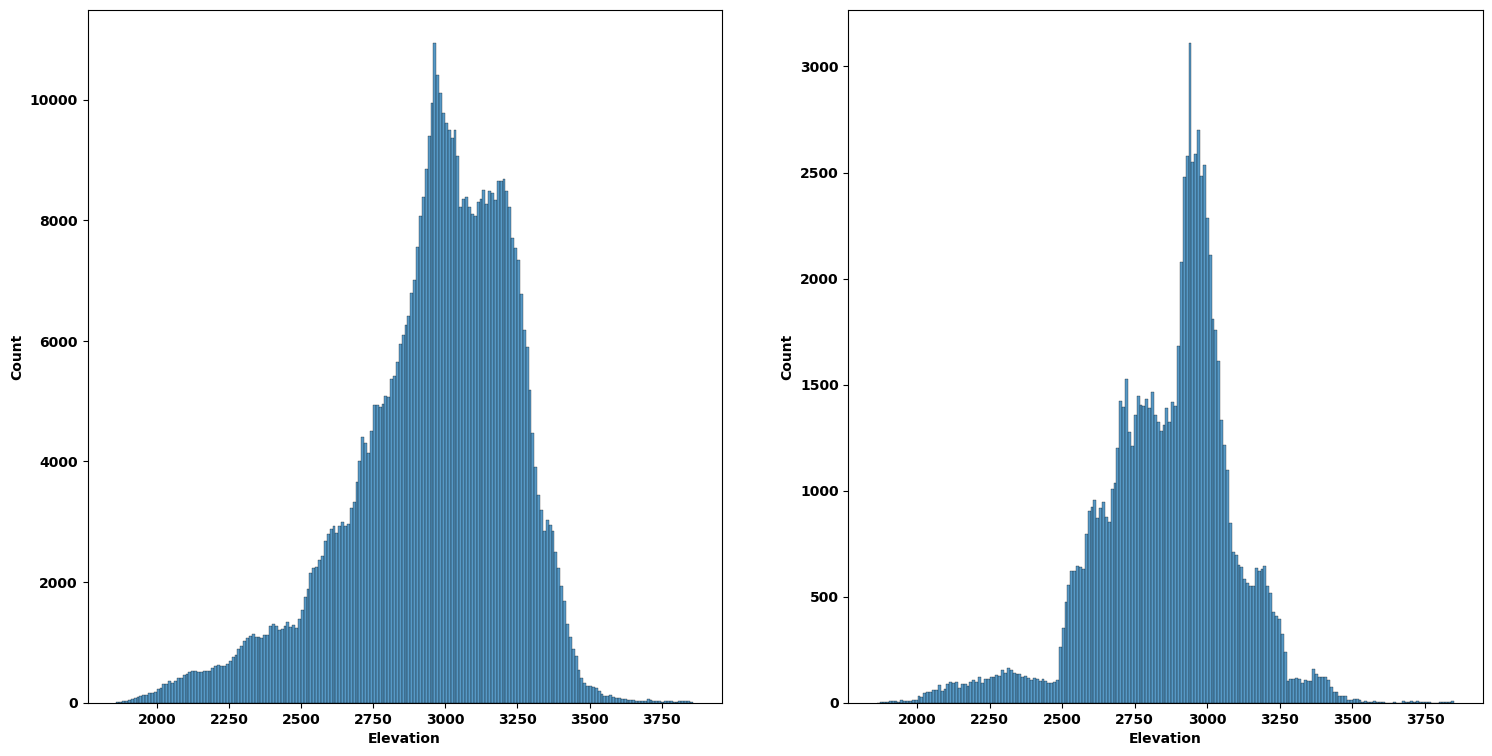

In [7]:
# Comparar la distribución de la variable "Elevation" entre los dos Dataframes
fig, axes = plt.subplots(1, 2, figsize=(18,9))
sns.histplot(dataset_cub['Elevation'], bins=200, ax=axes[0])
sns.histplot(dataset_cub[0:100000]['Elevation'], bins=200, ax=axes[1])
plt.show()

Se puede observar que la variable analizada no tiene la misma representación en el subconjunto de los _100.000_ primeros registros del dataset. Otra opción para conseguir un trozo de los datos originales, sería aplicar la técnica de **remuestro aleatorio (_random resampling_)**.

Vamos a hacer un remuestreo aleatorio para **quedarnos aproximadamente con el 17% de los datos** usando el método **[sample](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html)** sobre los _DataFrames_ de la librería _pandas_:

In [8]:
100/6

16.666666666666668

In [9]:
df_cub = dataset_cub.sample(frac=1/5.81012, random_state=222).reset_index(drop=True)
df_cub

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
0,3311.0,3.0,13.0,551.0,106.0,2780.0,202.0,215.0,149.0,2220.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7
1,2429.0,70.0,29.0,95.0,18.0,1589.0,237.0,169.0,43.0,391.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,2324.0,315.0,14.0,124.0,43.0,391.0,182.0,228.0,185.0,560.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,2959.0,346.0,10.0,90.0,20.0,5876.0,200.0,223.0,162.0,3979.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2910.0,62.0,15.0,330.0,97.0,3246.0,231.0,208.0,106.0,2275.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2908.0,59.0,15.0,633.0,271.0,1036.0,230.0,208.0,107.0,577.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
99996,2379.0,292.0,21.0,95.0,37.0,1321.0,155.0,230.0,213.0,330.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
99997,2786.0,147.0,7.0,42.0,7.0,2162.0,229.0,239.0,143.0,1574.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
99998,2863.0,36.0,10.0,514.0,26.0,2746.0,219.0,217.0,132.0,3550.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [10]:
# Consultamos las principales esdadísticas de la variable analizada anteriormente
df_cub['Elevation'].describe()[['count', 'mean', 'std']]

count    100000.000000
mean       2959.010060
std         279.864034
Name: Elevation, dtype: float64

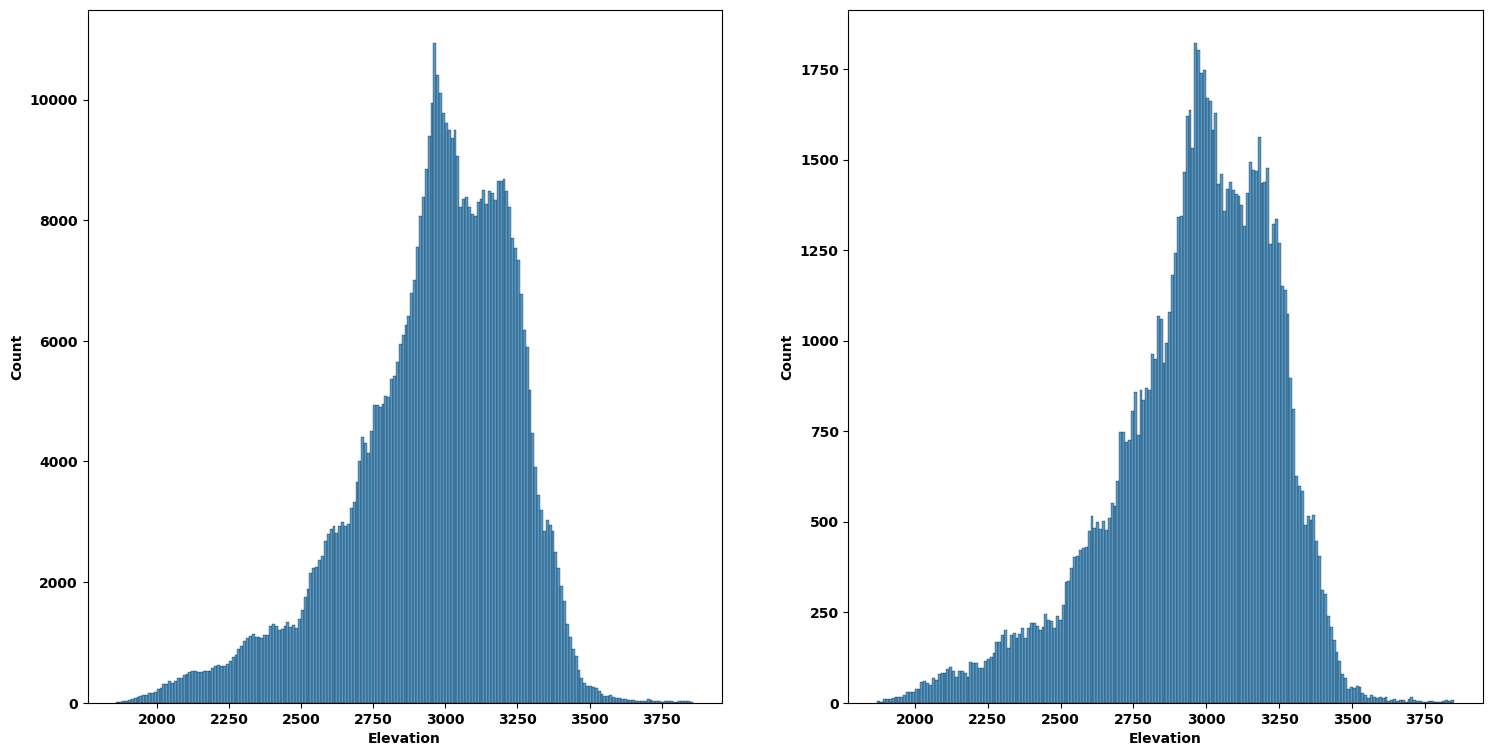

In [11]:
# Comparar la distribución de la variable "Elevation" entre el DataFrame original y el subconjunto obtenido mediante el remuestreo aleatorio
fig, axes = plt.subplots(1, 2, figsize=(18,9))
sns.histplot(dataset_cub['Elevation'], bins=200, ax=axes[0])
sns.histplot(df_cub['Elevation'], bins=200, ax=axes[1])
plt.show()

Podemos ver que este último subconjunto, a pesar de tener solamente 17% de los datos, **sí que incluye un set de observaciones muy representativas** respecto al dataset original. 

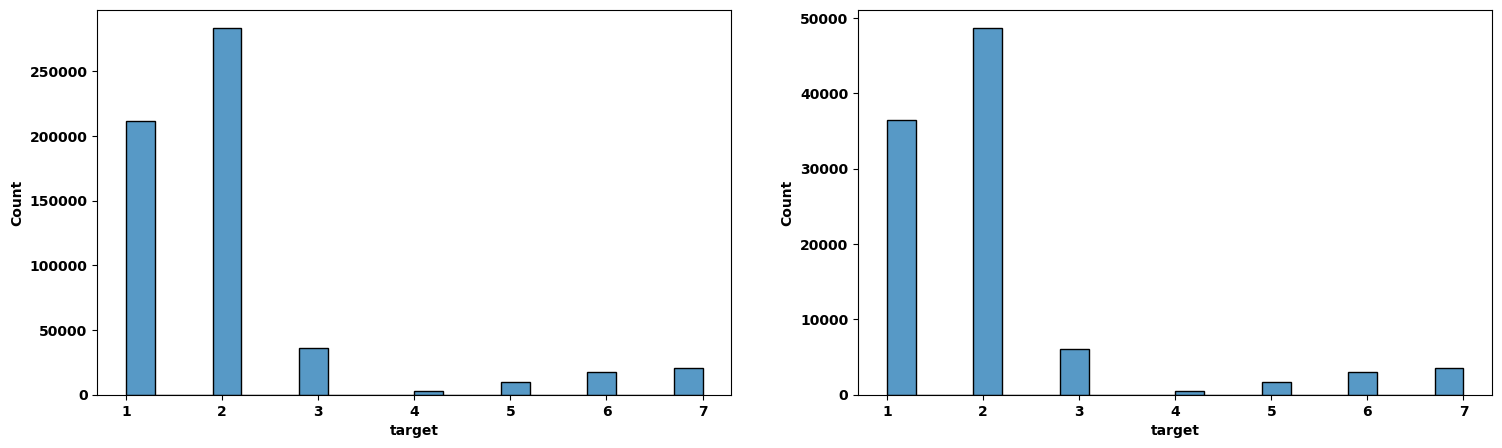

In [12]:
# Comparar la distribución de la variable objetivo entre los dos Dataframes
fig, axes = plt.subplots(1, 2, figsize=(18,5))
sns.histplot(dataset_cub['target'], bins=20, ax=axes[0])
sns.histplot(df_cub['target'], bins=20, ax=axes[1])
plt.show()

In [13]:
df_cub.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,2959.010060,155.927130,14.078440,268.415310,45.890660,2356.444880,212.226180,223.392060,142.541110,1984.702670,...,0.091120,0.078660,0.003050,0.003510,0.000190,0.000510,0.026360,0.023650,0.014600,2.05919
std,279.864034,111.880189,7.466349,212.389266,57.923415,1559.881883,26.567206,19.768911,38.116316,1328.355754,...,0.287781,0.269209,0.055143,0.059141,0.013783,0.022578,0.160204,0.151957,0.119946,1.40864
min,1871.000000,0.000000,0.000000,0.000000,-164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,2810.000000,59.000000,9.000000,108.000000,7.000000,1110.000000,198.000000,213.000000,119.000000,1022.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
50%,2995.000000,127.000000,13.000000,218.000000,29.000000,2005.000000,218.000000,226.000000,143.000000,1712.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000
75%,3163.000000,261.000000,18.000000,384.000000,68.000000,3336.000000,231.000000,237.000000,168.000000,2553.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000
max,3849.000000,360.000000,66.000000,1390.000000,592.000000,7117.000000,254.000000,254.000000,253.000000,7168.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.00000


In [14]:
df_cub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           100000 non-null  float64
 1   Aspect                              100000 non-null  float64
 2   Slope                               100000 non-null  float64
 3   Horizontal_Distance_To_Hydrology    100000 non-null  float64
 4   Vertical_Distance_To_Hydrology      100000 non-null  float64
 5   Horizontal_Distance_To_Roadways     100000 non-null  float64
 6   Hillshade_9am                       100000 non-null  float64
 7   Hillshade_Noon                      100000 non-null  float64
 8   Hillshade_3pm                       100000 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  100000 non-null  float64
 10  Wilderness_Area_0                   100000 non-null  float64
 11  Wilderness_Area_1          

In [15]:
# Conteo de valores perdidos/faltantes  
df_cub.isna().sum().sum()

0

In [16]:
# Consultamos los registros que tienen algún valor nulo
df_cub.drop(df_cub.dropna().index)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,target


### Reducción de Variables (___Dimensionality Reduction___)

### **`Ejercicio 18.1`**

Para conseguir un dataset con una dimensión reducidad, aplica la técnica de **Selección de variables basada en árbol de decisión** mediante las importancias de cada variable (**`Decision Trees Importances`**):

- Filtra el tablón para quedarnos solamente con **las variables que aglutinan hasta el `95%` de la información** que se requiere para estimar la variable objetivo.
- `random_state=100`

In [17]:
#18.1
target = 'target'
features = [x for x in df_cub.columns if x!=target]

print(target)
print(features)

target
['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_0', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Soil_Type_0', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39']


In [18]:
df_cub[target]

0        7
1        3
2        3
3        2
4        2
        ..
99995    2
99996    6
99997    2
99998    2
99999    1
Name: target, Length: 100000, dtype: int32

In [19]:
# Importar el algoritmo de árboles de decisión
from sklearn.tree import DecisionTreeRegressor

# Asignar el algortimo e indicar la profundidad máxima del árbol (con un número rotandamente grande para sobreajustar)
arbol_importancia = DecisionTreeRegressor(max_depth=len(features)+10, random_state=100)

# Entrenar un árbol con todo el conjunto de datos
arbol_importancia.fit(X=df_cub[features], y=df_cub[target])

DecisionTreeRegressor(max_depth=64, random_state=100)

In [20]:
# Comprobamos que se obtiene un R^2 muy alto. Lo desesable es que sea 1.
y_pred_arbol = arbol_importancia.predict(X=df_cub[features])

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(df_cub[target], y_pred_arbol))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(df_cub[target], y_pred_arbol)*100)
print('Mean Squared Error:', mean_squared_error(df_cub[target], y_pred_arbol))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(df_cub[target], y_pred_arbol)))
print('R^2 coefficient of determination:', r2_score(df_cub[target], y_pred_arbol))

Mean Absolute Error: 0.0
Mean Absolute Percentage Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
R^2 coefficient of determination: 1.0


In [21]:
# Importancias de cada variable en el árbol ajustado (Gini importance)
arbol_importancia.feature_importances_

array([3.41345452e-01, 3.54339666e-02, 1.74179718e-02, 4.32717735e-02,
       4.49401782e-02, 1.12351218e-01, 3.05681405e-02, 3.06711189e-02,
       2.59192824e-02, 1.28327839e-01, 1.52291307e-02, 5.43878389e-03,
       4.36187566e-02, 1.63883283e-03, 6.29726531e-04, 2.08724943e-03,
       5.09018496e-04, 3.28042196e-03, 7.92138946e-04, 1.41188353e-03,
       0.00000000e+00, 4.71167398e-06, 3.49876096e-05, 3.72608460e-03,
       2.73205287e-03, 6.47768772e-05, 2.79836759e-03, 2.21201678e-04,
       0.00000000e+00, 3.63613181e-04, 1.55545448e-03, 2.33340853e-06,
       5.42648590e-04, 1.28826161e-03, 3.43729040e-04, 1.30836818e-03,
       3.28275977e-03, 3.46672804e-03, 0.00000000e+00, 2.81872267e-04,
       1.91306225e-04, 1.19692788e-05, 2.39263962e-03, 1.40103065e-03,
       3.09237838e-03, 3.56762583e-02, 4.36534112e-03, 7.55804681e-04,
       1.06176770e-02, 4.97338452e-06, 1.88304618e-03, 8.84300309e-03,
       1.88447496e-02, 5.01898719e-03])

In [22]:
# Creamos un DataFrame con los datos de importancia
importancia = pd.DataFrame(arbol_importancia.feature_importances_, index=features, columns=["Importancia"])

# Ordenamos los datos
importancia.sort_values(by=importancia.columns[0], ascending=False, inplace=True)
importancia

,Importancia
Elevation,0.341345
Horizontal_Distance_To_Fire_Points,0.128328
Horizontal_Distance_To_Roadways,0.112351
Vertical_Distance_To_Hydrology,0.044940
Wilderness_Area_2,0.043619
Horizontal_Distance_To_Hydrology,0.043272
Soil_Type_31,0.035676
Aspect,0.035434
Hillshade_Noon,0.030671
Hillshade_9am,0.030568


In [23]:
importancia["imp_acum"] = importancia["Importancia"].cumsum()


In [24]:
# Conjunto de variables más importantes
importancia.loc[importancia['imp_acum']<=0.95]

,Importancia,imp_acum
Elevation,0.341345,0.341345
Horizontal_Distance_To_Fire_Points,0.128328,0.469673
Horizontal_Distance_To_Roadways,0.112351,0.582025
Vertical_Distance_To_Hydrology,0.044940,0.626965
Wilderness_Area_2,0.043619,0.670583
Horizontal_Distance_To_Hydrology,0.043272,0.713855
Soil_Type_31,0.035676,0.749531
Aspect,0.035434,0.784965
Hillshade_Noon,0.030671,0.815637
Hillshade_9am,0.030568,0.846205


In [25]:
# Definimos la lista de variables no tan importantes, cortando por el porcentaje de 95% de la información necesaria
variables = importancia.loc[importancia['imp_acum']>0.95].index.to_list()
print(variables)

['Soil_Type_39', 'Soil_Type_32', 'Soil_Type_9', 'Soil_Type_23', 'Soil_Type_22', 'Soil_Type_3', 'Soil_Type_30', 'Soil_Type_12', 'Soil_Type_10', 'Soil_Type_28', 'Soil_Type_1', 'Soil_Type_36', 'Wilderness_Area_3', 'Soil_Type_16', 'Soil_Type_5', 'Soil_Type_29', 'Soil_Type_21', 'Soil_Type_19', 'Soil_Type_4', 'Soil_Type_33', 'Soil_Type_0', 'Soil_Type_18', 'Soil_Type_2', 'Soil_Type_15', 'Soil_Type_20', 'Soil_Type_25', 'Soil_Type_13', 'Soil_Type_26', 'Soil_Type_11', 'Soil_Type_8', 'Soil_Type_27', 'Soil_Type_35', 'Soil_Type_7', 'Soil_Type_17', 'Soil_Type_14', 'Soil_Type_24', 'Soil_Type_6']


In [26]:
print("Variables iniciales: ", len(features))
print("Variables no importantes (a eliminar): ", len(variables))

Variables iniciales:  54
Variables no importantes (a eliminar):  37


In [27]:
df_cub_fl = df_cub.drop(labels=variables, axis='columns')
df_cub_fl

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_0,Wilderness_Area_1,Wilderness_Area_2,Soil_Type_31,Soil_Type_34,Soil_Type_37,Soil_Type_38,target
0,3311.0,3.0,13.0,551.0,106.0,2780.0,202.0,215.0,149.0,2220.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,7
1,2429.0,70.0,29.0,95.0,18.0,1589.0,237.0,169.0,43.0,391.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3
2,2324.0,315.0,14.0,124.0,43.0,391.0,182.0,228.0,185.0,560.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,2959.0,346.0,10.0,90.0,20.0,5876.0,200.0,223.0,162.0,3979.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2910.0,62.0,15.0,330.0,97.0,3246.0,231.0,208.0,106.0,2275.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2908.0,59.0,15.0,633.0,271.0,1036.0,230.0,208.0,107.0,577.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
99996,2379.0,292.0,21.0,95.0,37.0,1321.0,155.0,230.0,213.0,330.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
99997,2786.0,147.0,7.0,42.0,7.0,2162.0,229.0,239.0,143.0,1574.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
99998,2863.0,36.0,10.0,514.0,26.0,2746.0,219.0,217.0,132.0,3550.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2


---

### **`Ejercicio 18.2`**

Después de filtrar el dataset vamos a plantear un **problema de clasificación** para conseguir 
un **clasificador de la cubierta forestal** en basea a las **variables cartográficas**.:  

**`18.2.1`** Genera una gráfica para visualizar la distribución de las variables del datset en conjunto. Analiza dicha gráfica y explica si hay una necesidad de normalizar los datos.  

**`18.2.2`** Normaliza todas las variables del dataset a una escala estándar. Para ello puedes realizar estas transformaciones:

- LLevar las variables de entrada a una escala de `0` a `1`
- Convertir la variable objetivo en valores numéricos **entre 0 y el número de clases menos 1**

In [28]:
df_ej2 = df_cub_fl.copy()

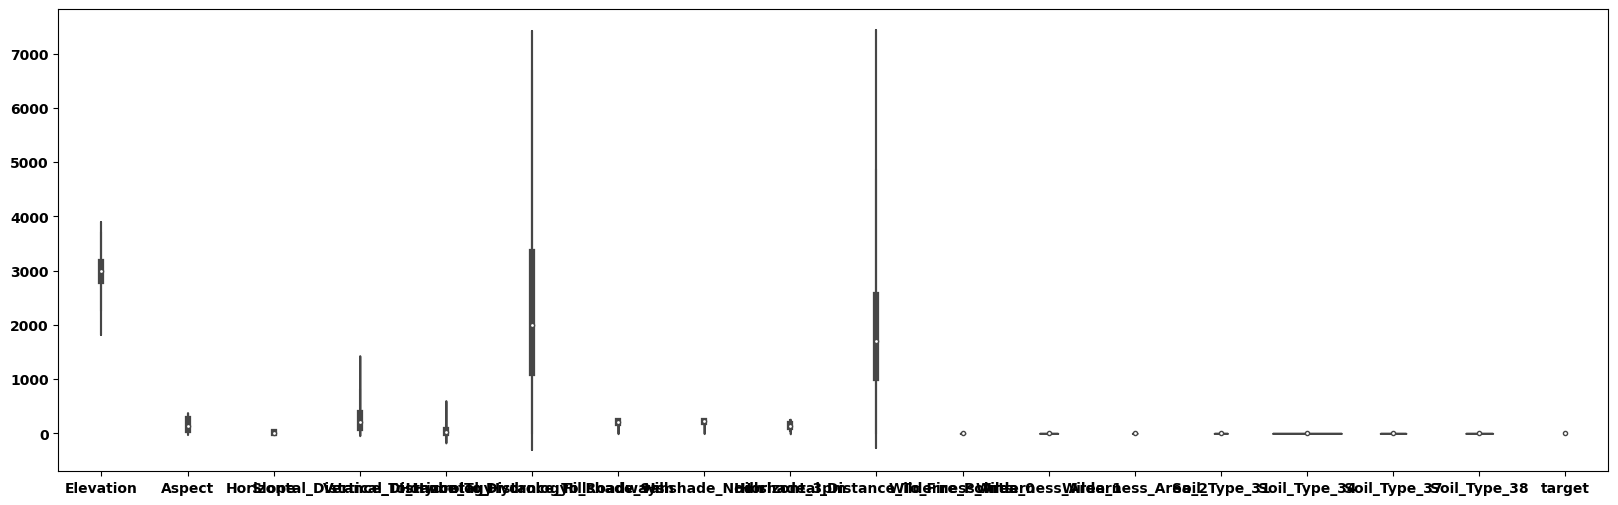

In [29]:
# 18.2.1
# Graficar la distribución de los valores originales
plt.figure(figsize=(20,6))
sns.violinplot(data=df_ej2, orient='v')
plt.show()

In [31]:
#18.2.2
# Crear la columna nueva "Escenario" y borrar la columna target antigua 'target'
df_ej2["Escenario"] = np.where(df_ej2['target']<df_ej2['target'].quantile(0.33),0,1)

df_ej2.drop(['target'], axis='columns', inplace=True)
df_ej2

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_0,Wilderness_Area_1,Wilderness_Area_2,Soil_Type_31,Soil_Type_34,Soil_Type_37,Soil_Type_38,Escenario
0,3311.0,3.0,13.0,551.0,106.0,2780.0,202.0,215.0,149.0,2220.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1
1,2429.0,70.0,29.0,95.0,18.0,1589.0,237.0,169.0,43.0,391.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
2,2324.0,315.0,14.0,124.0,43.0,391.0,182.0,228.0,185.0,560.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2959.0,346.0,10.0,90.0,20.0,5876.0,200.0,223.0,162.0,3979.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,2910.0,62.0,15.0,330.0,97.0,3246.0,231.0,208.0,106.0,2275.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2908.0,59.0,15.0,633.0,271.0,1036.0,230.0,208.0,107.0,577.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
99996,2379.0,292.0,21.0,95.0,37.0,1321.0,155.0,230.0,213.0,330.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
99997,2786.0,147.0,7.0,42.0,7.0,2162.0,229.0,239.0,143.0,1574.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
99998,2863.0,36.0,10.0,514.0,26.0,2746.0,219.0,217.0,132.0,3550.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [32]:
## Preparar el conjunto de datos del modelo

# Variables independientes (features)
X = df_ej2.drop('Escenario', axis='columns')

# Variable dependiente (target) que son los niveles de aire con menos contaminación
y = df_ej2['Escenario']

In [33]:
# importar los objetos necesarios de la librería sklearn
from sklearn.preprocessing import StandardScaler

# declarar el tipo de escalamiento y aplicarlo al conjunto de datos
escalado = StandardScaler().fit(X)
dataset_normal = escalado.transform(X)
dataset_normal

array([[ 1.25772396, -1.36688985, -0.1444408 , ..., -0.0593495 ,
         6.07752146, -0.15563698],
       [-1.89382216, -0.76803195,  1.99851828, ..., -0.0593495 ,
        -0.16454076, -0.15563698],
       [-2.26900623,  1.42182157, -0.01050586, ..., -0.0593495 ,
        -0.16454076, -0.15563698],
       ...,
       [-0.61819635, -0.07979227, -0.94805046, ..., -0.0593495 ,
        -0.16454076, -0.15563698],
       [-0.34306137, -1.07192999, -0.54624563, ..., -0.0593495 ,
        -0.16454076, -0.15563698],
       [ 0.03926905, -0.83059919,  1.19490863, ..., -0.0593495 ,
        -0.16454076, -0.15563698]])

In [34]:
# Lo convertimos en un DataFrame, añadiendole sus etiquetas
X_normal = pd.DataFrame(dataset_normal, columns=X.columns)
print(type(X_normal))
X_normal

<class 'pandas.core.frame.DataFrame'>


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_0,Wilderness_Area_1,Wilderness_Area_2,Soil_Type_31,Soil_Type_34,Soil_Type_37,Soil_Type_38
0,1.257724,-1.366890,-0.144441,1.330510,1.037743,0.271532,-0.384919,-0.424510,0.169453,0.177135,-0.905540,-0.231053,1.138860,-0.316631,-0.05935,6.077521,-0.155637
1,-1.893822,-0.768032,1.998518,-0.816502,-0.481512,-0.491992,0.932501,-2.751408,-2.611522,-1.199762,-0.905540,-0.231053,1.138860,-0.316631,-0.05935,-0.164541,-0.155637
2,-2.269006,1.421822,-0.010506,-0.679959,-0.049905,-1.260002,-1.137731,0.233091,1.113935,-1.072536,-0.905540,-0.231053,-0.878071,-0.316631,-0.05935,-0.164541,-0.155637
3,-0.000036,1.698905,-0.546246,-0.840043,-0.446983,2.256307,-0.460200,-0.019832,0.510516,1.501335,1.104314,-0.231053,-0.878071,-0.316631,-0.05935,-0.164541,-0.155637
4,-0.175122,-0.839537,0.123429,0.289963,0.882365,0.570274,0.706657,-0.778603,-0.958679,0.218540,-0.905540,-0.231053,1.138860,3.158249,-0.05935,-0.164541,-0.155637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-0.182268,-0.866352,0.123429,1.716596,3.886347,-0.846507,0.669017,-0.778603,-0.932443,-1.059738,-0.905540,-0.231053,1.138860,-0.316631,-0.05935,-0.164541,-0.155637
99996,-2.072481,1.216243,0.927039,-0.816502,-0.153491,-0.663800,-2.154027,0.334261,1.848532,-1.245684,-0.905540,-0.231053,-0.878071,-0.316631,-0.05935,-0.164541,-0.155637
99997,-0.618196,-0.079792,-0.948050,-1.066045,-0.671419,-0.124654,0.631376,0.789523,0.012039,-0.309183,1.104314,-0.231053,-0.878071,-0.316631,-0.05935,-0.164541,-0.155637
99998,-0.343061,-1.071930,-0.546246,1.156301,-0.343398,0.249735,0.254971,-0.323341,-0.276553,1.178378,1.104314,-0.231053,-0.878071,-0.316631,-0.05935,-0.164541,-0.155637


In [35]:
X_normal.describe().round(4)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_0,Wilderness_Area_1,Wilderness_Area_2,Soil_Type_31,Soil_Type_34,Soil_Type_37,Soil_Type_38
count,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000
mean,-0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,0.0000,0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-3.8877,-1.3937,-1.8856,-1.2638,-3.6236,-1.5107,-7.9883,-11.3002,-3.7397,-1.4941,-0.9055,-0.2311,-0.8781,-0.3166,-0.0593,-0.1645,-0.1556
25%,-0.5324,-0.8664,-0.6802,-0.7553,-0.6714,-0.7991,-0.5355,-0.5257,-0.6176,-0.7247,-0.9055,-0.2311,-0.8781,-0.3166,-0.0593,-0.1645,-0.1556
50%,0.1286,-0.2586,-0.1444,-0.2374,-0.2916,-0.2253,0.2173,0.1319,0.0120,-0.2053,-0.9055,-0.2311,-0.8781,-0.3166,-0.0593,-0.1645,-0.1556
75%,0.7289,0.9392,0.5252,0.5442,0.3817,0.6280,0.7067,0.6884,0.6679,0.4278,1.1043,-0.2311,1.1389,-0.3166,-0.0593,-0.1645,-0.1556
max,3.1801,1.8240,6.9541,5.2808,9.4282,3.0519,1.5724,1.5483,2.8980,3.9021,1.1043,4.3280,1.1389,3.1582,16.8493,6.0775,6.4252


---

### **`Ejercicio 18.3`**

Después de estandarizar los datos procedemos a crear el **primer clasificador**:  

**`18.3.1`** Divide el datset en _training_ y en _test_:
- Guarda el `20%` de los datos para testeo.
- `random_state=100`  

**`18.3.2`** Entrena un modelo de **regresión logística**:
- Número máximo de iteraciones igual a `1000`
- `random_state=100`

**`18.3.3`** Calcula diferentes métricas para evaluar este modelo y analiza su rendimiendo.
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`
- Confusion matrix

In [36]:
# 18.3.1
# Separar los conjuntos de datos de entrenamiento (Training) y de prueba (Test) para las variables de entrada y salida
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normal, y, test_size=0.2, random_state=100)

# "test_size" representa la proporción del conjunto de datos a incluir en la división de Test
print(X_train.shape[0])
print(X_test.shape[0])
X_train.shape[0] + X_test.shape[0]
# print(X_test.columns)
# print(X_normal.columns)
# print(X_train.columns)


80000
20000


100000

In [37]:
# 18.3.2
# Importar el módulo que corresponde al algoritmo
from sklearn.linear_model import LogisticRegression

# Asignar el algoritmo que vamos a aplicar 
log_r = LogisticRegression(max_iter=1000,
                           random_state=100)


In [38]:
# Entrenar el modelo
log_r.fit(X_train, y_train)

# Calcular las predicciones con el conjunto de prueba
y_pred = log_r.predict(X_test)
# Imprimir la salida del modelo (los niveles de calidad del aire)
print(y_pred)

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

In [ ]:
# 18.3.3

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

NameError: name 'y_pred' is not defined

---

### **`Ejercicio 18.4`**

Ahora probamos la creación de otros modelo basados en **árboles de decisión**:  

**`18.4.1`** Entrena un modelo tipo **Decision Tree Classifire** y calcula las métricas correspondientes para analizar su rendimiento en comparación con el modelo anterior:
- `random_state=100`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.4.2`** Saca la curva de complejidad del modelo _Decision Tree_ (**Model Complexity Curve**) y crea un nuevo clasificador **con el valor óptimo de la profundidad del árbol** según esta gráfica. Después saca las métricas correspondiente y analiza el rendimiento del modelo en comparación de los anteriores.
- `random_state=100`
- rango de profundidades:  de `2` a `30` __inclusive__

**`18.4.3`** Saca la gráfica de el *Learning Curve* para estos modelos, definiendo y aplicando una función que toma el valor del hiperparámetro como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.
- `random_state=100`
- (*Sugerencia*: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

In [ ]:
# 18.4.1

from sklearn.tree import DecisionTreeClassifier

arbol_clas = DecisionTreeClassifier(random_state=100)

# Ajustamos el algoritmo al conjunto de datos de entrenamiento
arbol_clas.fit(X_train, y_train)

# lanzamos las predicciones (para el conjunto de test que son los datos no vistos por el algoritmo en la fase de modelización)
y_pred_arbol = arbol_clas.predict(X_test)

from sklearn.metrics import classification_report
#accuracy_score(y_test, y_pred_arbol)
classification_report(y_test, y_pred_arbol)



'              precision    recall  f1-score   support\n\n           1       1.00      1.00      1.00     20000\n\n    accuracy                           1.00     20000\n   macro avg       1.00      1.00      1.00     20000\nweighted avg       1.00      1.00      1.00     20000\n'

El mejor valor de max_depth podría ser = 2  que consigue un Accuracy = 1.0


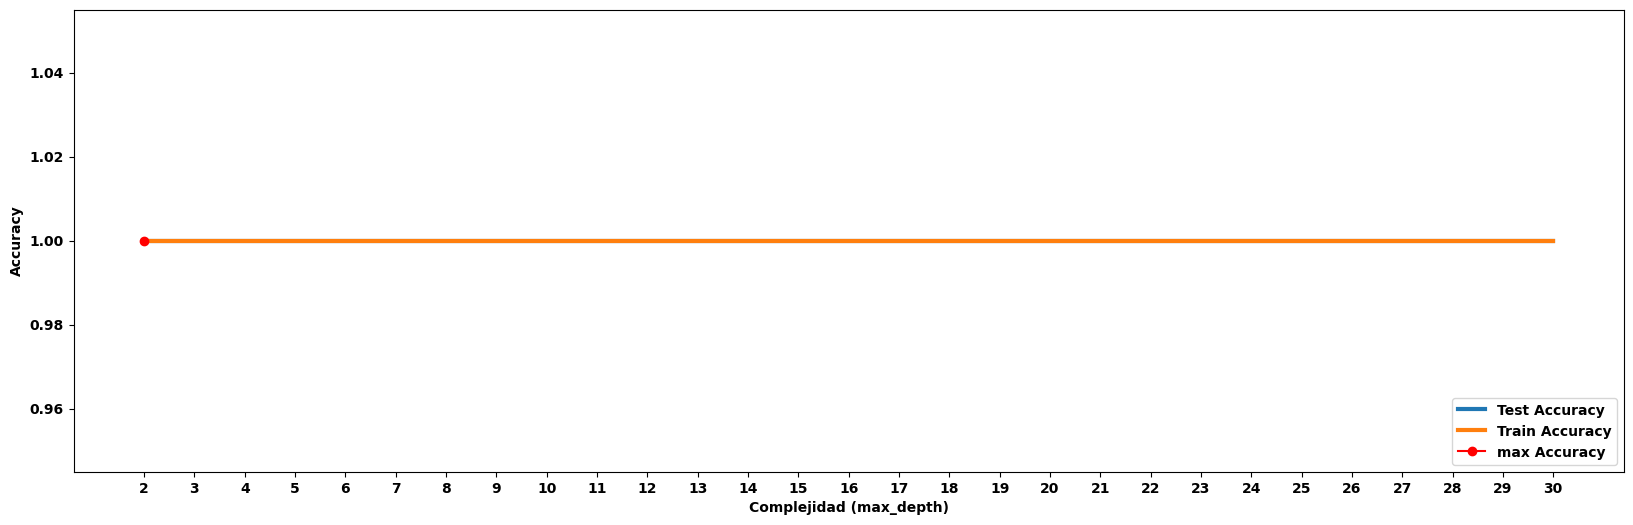

In [ ]:
#18.4.2

# Consideramos un rango para asignar el hiperparámetro 
hiper_param = np.arange(2,31)  
    
# Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento de los árboles
train_score = np.zeros(hiper_param.size) 
test_score = np.zeros(hiper_param.size) 

for i in range(hiper_param.size):
    # Generamos un árbol para cada hiperparámetro, lo entrenamos y calculamos el rendimiento sobre datos de train y de test 
    mod_arbol = DecisionTreeClassifier(max_depth=hiper_param[i], random_state=100)
    mod_arbol.fit(X_train, y_train)
    train_score[i] = accuracy_score(y_train, mod_arbol.predict(X_train)) 
    test_score[i] = accuracy_score(y_test, mod_arbol.predict(X_test))    

print("El mejor valor de max_depth podría ser =", hiper_param[np.argmax(test_score)],
      " que consigue un Accuracy =", max(test_score))


# Graficamos el rendimiento de training versus de test
plt.figure(figsize=(20,6))
plt.plot(hiper_param, test_score, linewidth=3, label='Test Accuracy')
plt.plot(hiper_param, train_score, linewidth=3, label='Train Accuracy')
plt.plot(hiper_param[np.argmax(test_score)], max(test_score),
        marker='o', color = "red", label="max Accuracy")
plt.xticks(hiper_param)
plt.xlabel('Complejidad (max_depth)')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

#Explicacion

 #No entiendo porque no hay curva de aprendizaje

In [ ]:
#18.4.3
def curva_aprendizaje_arbol(profundidad: int=None):
    """Función para sacar la gráfica de Learning Curve a partir de la profundidad del árbol"""

    # Se toma el valor entero y si no se indica nada por defecto se pasa el None como la profundidad máxima
    if profundidad:
        hiper_parametro = int(profundidad)
    else:
        hiper_parametro = None

    # Generar la estructura del árbol
    modelo_arbol = DecisionTreeClassifier(max_depth=hiper_parametro, random_state=100)
    
    # Crear un listado de los tamaños de subconjuntos de datos de entrenamiento
    num_samples = np.linspace(100,X_train.shape[0],100).astype(int)

    # Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento de los árboles
    train_score = np.zeros(num_samples.size) 
    test_score = np.zeros(num_samples.size)

    for i in range(num_samples.size):
        # Generamos un árbol para cada subconjunto de datos de entrenamiento y lo ajustamos  
        modelo_arbol.fit(X_train[:num_samples[i]], y_train[:num_samples[i]])

        # Calculamos el área bajo la curva de funcionamiento del receptor sobre datos de train y de test
        train_score[i] = accuracy_score(y_train[:num_samples[i]], modelo_arbol.predict(X_train[:num_samples[i]])) 
        test_score[i] = accuracy_score(y_test, modelo_arbol.predict(X_test))

    print("La diferencia final del rendimiento del modelo entre training y test es= ", train_score[-1]-test_score[-1])

    # Graficamos el rendimiento de training versus de test
    plt.plot(num_samples, test_score, label = 'Test Accuracy')
    plt.plot(num_samples, train_score, label = 'Train Accuracy')
    plt.title('Curva de aprendizaje (Learning Curve) para la profundidad = %s' % hiper_parametro)
    plt.xlabel('Tamaño de entrenamiento (Training size)')
    plt.ylabel('Accuracy')
    plt.legend(loc = 'lower right')
    plt.show()    


La diferencia final del rendimiento del modelo entre training y test es=  0.0


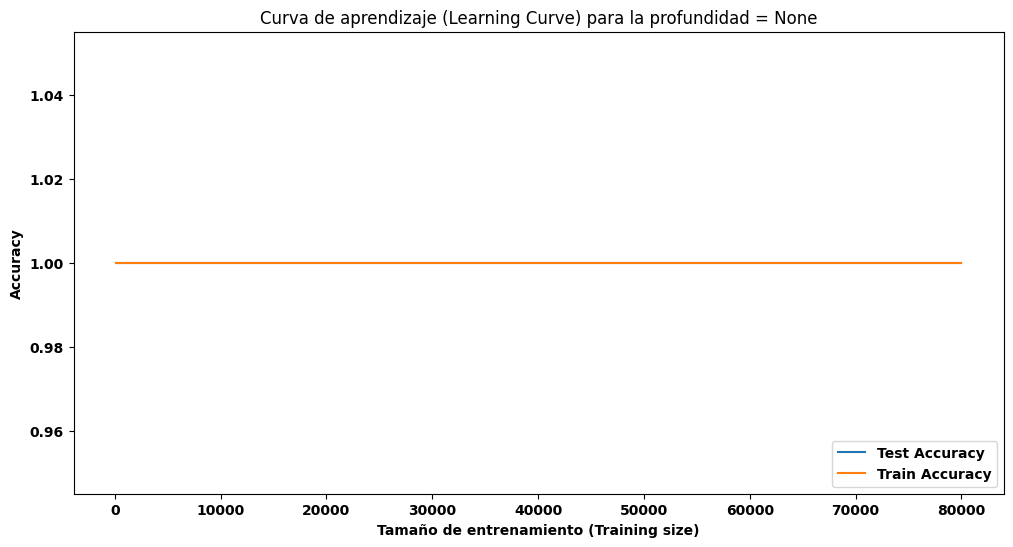

In [ ]:
curva_aprendizaje_arbol()

---

### **`Ejercicio 18.5`**

Ahora probamos la creación de otros modelo basados en **bosques aleatorios**:  

**`18.5.1`** Entrena un modelo tipo **Random Forest Classifire** y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `random_state=100`

**`18.5.2`** Consulta la profundidad de todos los árboles del bosque creado en el paso anterior y calcula la mediana de este parámetro.

**`18.5.3`** Saca las curvas de complejidad del modelo _Random Forest_ (**Model Complexity Curve**) y crea un nuevo clasificador **con los valores óptimos** analizados dentro de los rangos indicados para cada hiperparámeto. Después crea un modelo con estos parámetros "óptimos" y saca las métricas correspondientes para analizar el rendimiento del modelo en comparación con los anteriores.
- `random_state=100`
- define un rango con funciones de _numpy_ para considerar estos números de árboles: `[200, 250, 300, 350, 400]`  
- rango de profundidades:  de `20` a `40` __inclusive__ en pasos de 2 en 2.
- considera estas opciones para _max_features_ : `["auto", "log2", None]`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`
- **OOB** (out-of-bag score)

**`18.5.4`** Saca la gráfica del *Learning Curve* para estos modelos, definiendo y aplicando una función que toma el valor de los hiperparámetros analizados como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.
- `random_state=100`
- (*Sugerencia*: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

---

In [ ]:
# 18.5.1
# importamos el modelo de clasificación con bosques aleatorios
from sklearn.ensemble import RandomForestClassifier

bosque_clas = RandomForestClassifier(random_state=100, oob_score=True,)

# Ajustamos el algoritmo al conjunto de datos de entrenamiento
bosque_clas.fit(X_train, y_train)

# lanzamos las predicciones (para el conjunto de test que son los datos no vistos por el algoritmo en la fase de modelización)
y_pred_bosque = bosque_clas.predict(X_test)

In [ ]:
#18.5.2
bosque_clas.estimators_[62].get_depth()

0

El mejor valor de max_depth podría ser = 2  que consigue un Accuracy = 1.0


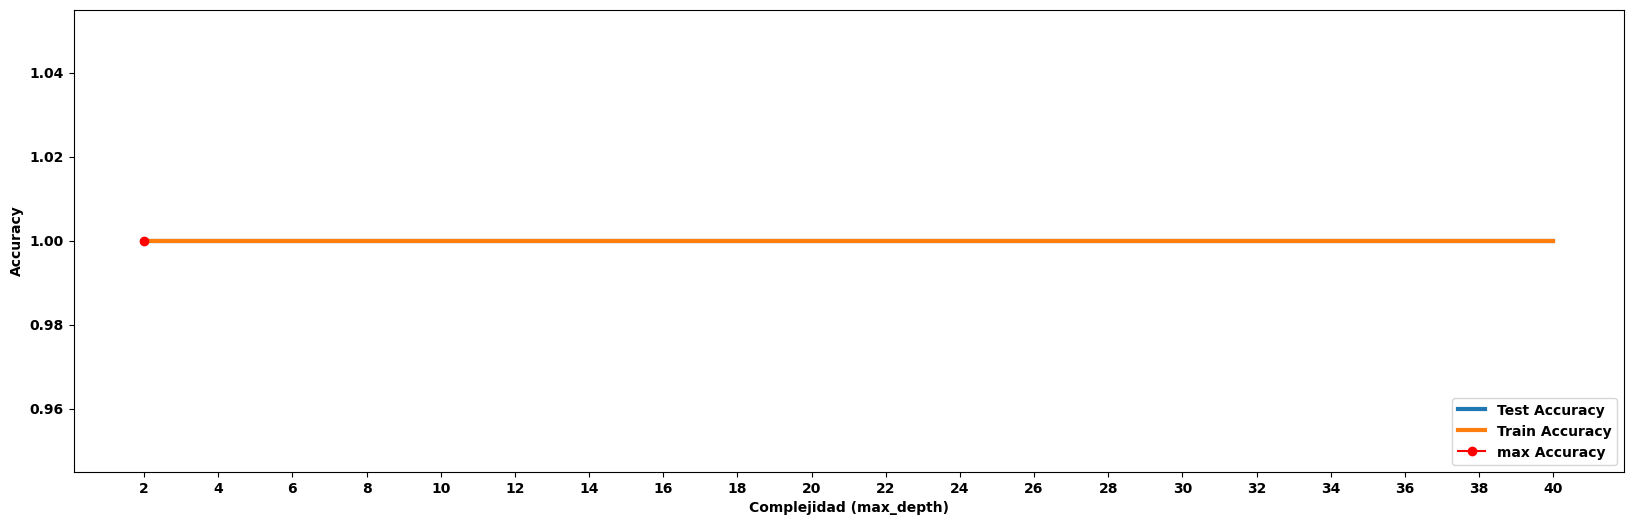

In [ ]:
#18.5.3

# Consideramos un rango para asignar el hiperparámetro 
hiper_param = np.array([200, 250, 300, 350, 400])  
    
# Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento de los modelos
train_score = np.zeros(hiper_param.size) 
test_score = np.zeros(hiper_param.size) 

for i in range(hiper_param.size):
    # Generamos un modelo con cada hiperparámetro, lo entrenamos y calculamos el rendimiento sobre datos de train y de test 
    mod_knn = RandomForestClassifier(n_neighbors=hiper_param[i])
    mod_knn.fit(X_train, y_train)
    train_score[i] = accuracy_score(y_train, mod_knn.predict(X_train)) 
    test_score[i] = accuracy_score(y_test, mod_knn.predict(X_test))    

print("El mejor valor de n_neighbors podría ser =", hiper_param[np.argmax(test_score)],
      " que consigue un Accuracy =", max(test_score))


# Graficamos el rendimiento de training versus de test
plt.figure(figsize=(20,6))
plt.plot(hiper_param, test_score, linewidth=3, label='Test Accuracy')
plt.plot(hiper_param, train_score, linewidth=3, label='Train Accuracy')
plt.plot(hiper_param[np.argmax(test_score)], max(test_score),
        marker='o', color = "red", label="max Accuracy")
plt.xticks(hiper_param)
plt.xlabel('Complejidad (n_neighbors)')
plt.ylabel('Accuracy')
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
# 18.5.4
def curva_aprendizaje_arbol(profundidad: int=None):
    """Función para sacar la gráfica de Learning Curve a partir de la profundidad del árbol"""

    # Se toma el valor entero y si no se indica nada por defecto se pasa el None como la profundidad máxima
    if profundidad:
        hiper_parametro = int(profundidad)
    else:
        hiper_parametro = None

    # Generar la estructura del árbol
    modelo_arbol = DecisionTreeClassifier(max_depth=hiper_parametro, random_state=100)
    
    # Crear un listado de los tamaños de subconjuntos de datos de entrenamiento
    num_samples = np.linspace(100,X_train.shape[0],100).astype(int)

    # Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento de los árboles
    train_score = np.zeros(num_samples.size) 
    test_score = np.zeros(num_samples.size)

    for i in range(num_samples.size):
        # Generamos un árbol para cada subconjunto de datos de entrenamiento y lo ajustamos  
        modelo_arbol.fit(X_train[:num_samples[i]], y_train[:num_samples[i]])

        # Calculamos el área bajo la curva de funcionamiento del receptor sobre datos de train y de test
        train_score[i] = accuracy_score(y_train[:num_samples[i]], modelo_arbol.predict(X_train[:num_samples[i]])) 
        test_score[i] = accuracy_score(y_test, modelo_arbol.predict(X_test))

    print("La diferencia final del rendimiento del modelo entre training y test es= ", train_score[-1]-test_score[-1])

    # Graficamos el rendimiento de training versus de test
    plt.plot(num_samples, test_score, label = 'Test Accuracy')
    plt.plot(num_samples, train_score, label = 'Train Accuracy')
    plt.title('Curva de aprendizaje (Learning Curve) para la profundidad = %s' % hiper_parametro)
    plt.xlabel('Tamaño de entrenamiento (Training size)')
    plt.ylabel('Accuracy')
    plt.legend(loc = 'lower right')
    plt.show()    


La diferencia final del rendimiento del modelo entre training y test es=  0.0


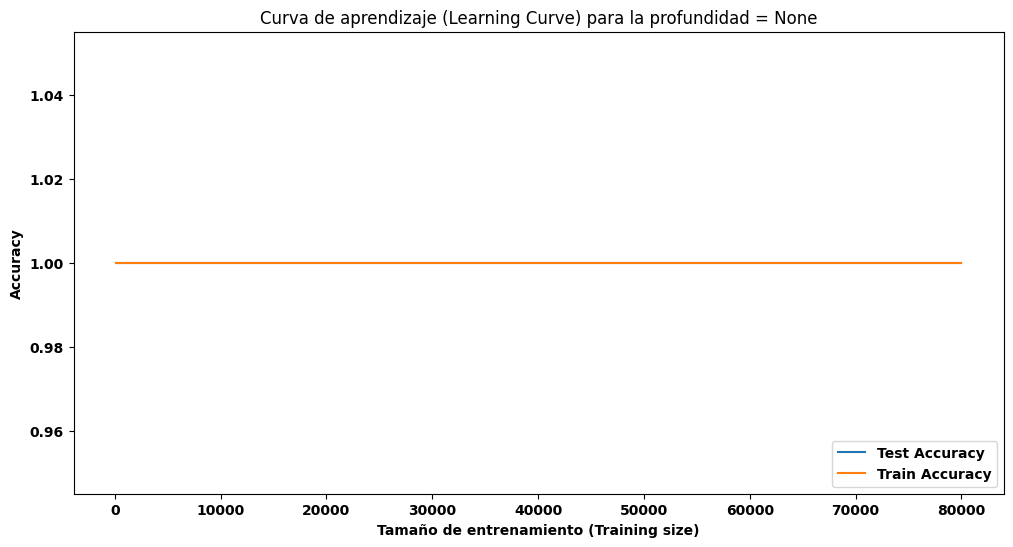

In [ ]:
curva_aprendizaje_arbol()

### **`Ejercicio 18.6`**

Ahora probamos la creación de otros modelo basados en **Gradient Boosting**:  

**`18.6.1`** Entrena un modelo tipo **XGBoost Classifire** y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `random_state=100`

**`18.6.2`** Consulta el número y la profundidad máxima de los árboles del bosque creado en el paso anterior.

**`18.6.3`** Saca las curvas de complejidad del modelo _XGBClassifier_ (**Model Complexity Curve**) y crea un nuevo clasificador **con los valores óptimos** analizados dentro de los rangos indicados para cada hiperparámeto. Después crea un modelo con estos parámetros "óptimos" y saca las métricas correspondientes para analizar el rendimiento del modelo en comparación con los anteriores.
- `random_state=100`
- define un rango con funciones de _numpy_ para considerar estos números de árboles: `[100, 200, 300, 400, 500]`  
- rango de profundidades:  de `6` a `20` __inclusive__ en pasos de 2 en 2.
- valores a considerar para el *`learning_rate`*: `[0.01, 0.1, 0.3, 0.5]`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.6.4`** Saca la gráfica del *Learning Curve* para estos modelos, definiendo y aplicando una función que toma el valor de los hiperparámetros analizados como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.
- `random_state=100`
- (*Sugerencia*: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

---

In [ ]:
#18.6.1
%pip install xgboost
# Importamos la librería instalada
from xgboost import XGBClassifier 
from sklearn.metrics import roc_auc_score

# LLamar al modelo, entrenarlo y sacar los valores predichos
modelo_xgb = XGBClassifier(random_state=100) 
modelo_xgb.fit(X_train, y_train) 
y_pred_xgb = modelo_xgb.predict(X_test)

# Consultamos el rendimiento del nuevo modelo
print("Accuracy: ", accuracy_score(y_test, y_pred_xgb))
print("ROC AUC : ", roc_auc_score(y_test, y_pred_xgb))

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb))

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\flore\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0], got [1]

In [ ]:
#18.6.2
bosque_clas_profundidades = [arbol.get_depth() for arbol in bosque_clas.estimators_]
bosque_clas_profundidades

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [ ]:
#18.6.3
# LLamar al modelo, entrenarlo y sacar los valores predichos
modelo_xgb = XGBClassifier(random_state=100,) 
modelo_xgb.fit(X_train, y_train) 
y_pred_xgb = modelo_xgb.predict(X_test)

### **`Ejercicio 18.7`**

Ahora probamos la creación de otros modelo basados en **métodos Bayesianos**:  

**`18.7.1`** Entrena un modelo para cada tipo de algoritmos Bayesianos y calcula las métricas correspondientes para analizar sus rendimientos en comparación con los modelos anteriores:
- `GaussianNB`
- `MultinomialNB`
- `ComplementNB`
- `BernoulliNB`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.7.2`** Saca la gráfica del *Learning Curve* para el modelo `GaussianNB` y explica si este modelo sufre de un posible "_Overfitting_" o "_Underfitting_" comparando con modelos anteriores.
- `random_state=100`
- (*Sugerencia*: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

In [ ]:
#18.7.1 GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
# Asignar el algortimo e indicar la profundidad máxima del árbol (con un número rotandamente grande para sobreajustar)
arbol_importancia = GaussianNB()

# Entrenar un árbol con todo el conjunto de datos
arbol_importancia.fit(X=df_cub[features], y=df_cub[target])

GaussianNB()

In [ ]:
# Comprobamos que se obtiene un R^2 muy alto. Lo desesable es que sea 1.
y_pred_arbol = arbol_importancia.predict(X=df_cub[features])

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(df_cub[target], y_pred_arbol))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(df_cub[target], y_pred_arbol)*100)
print('Mean Squared Error:', mean_squared_error(df_cub[target], y_pred_arbol))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(df_cub[target], y_pred_arbol)))
print('R^2 coefficient of determination:', r2_score(df_cub[target], y_pred_arbol))

Mean Absolute Error: 1.12364
Mean Absolute Percentage Error: 69.47584523809525
Mean Squared Error: 3.74648
Root Mean Squared Error: 1.9355825996324725
R^2 coefficient of determination: -0.888112145901166


In [ ]:
#18.7.1 MultinomialNB
from sklearn.naive_bayes import MultinomialNB
# Asignar el algortimo e indicar la profundidad máxima del árbol (con un número rotandamente grande para sobreajustar)
arbol_importancia = MultinomialNB()

# Entrenar un árbol con todo el conjunto de datos
arbol_importancia.fit(X=df_cub[features], y=df_cub[target])

TypeError: __init__() takes 1 positional argument but 2 were given

In [ ]:
# Comprobamos que se obtiene un R^2 muy alto. Lo desesable es que sea 1.
y_pred_arbol = arbol_importancia.predict(X=df_cub[features])

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(df_cub[target], y_pred_arbol))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(df_cub[target], y_pred_arbol)*100)
print('Mean Squared Error:', mean_squared_error(df_cub[target], y_pred_arbol))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(df_cub[target], y_pred_arbol)))
print('R^2 coefficient of determination:', r2_score(df_cub[target], y_pred_arbol))

AttributeError: 'MultinomialNB' object has no attribute 'feature_log_prob_'

In [ ]:
#ComplementNB
from sklearn.naive_bayes import ComplementNB
# Asignar el algortimo e indicar la profundidad máxima del árbol (con un número rotandamente grande para sobreajustar)
arbol_importancia = ComplementNB()

arbol_importancia.fit(X=df_cub[features], y=df_cub[target])


# Comprobamos que se obtiene un R^2 muy alto. Lo desesable es que sea 1.
y_pred_arbol = arbol_importancia.predict(X=df_cub[features])

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(df_cub[target], y_pred_arbol))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(df_cub[target], y_pred_arbol)*100)
print('Mean Squared Error:', mean_squared_error(df_cub[target], y_pred_arbol))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(df_cub[target], y_pred_arbol)))
print('R^2 coefficient of determination:', r2_score(df_cub[target], y_pred_arbol))


ValueError: Negative values in data passed to ComplementNB (input X)

In [ ]:
#BernoulliNB
from sklearn.naive_bayes import BernoulliNB
# Asignar el algortimo e indicar la profundidad máxima del árbol (con un número rotandamente grande para sobreajustar)
arbol_importancia = BernoulliNB()

# Entrenar un árbol con todo el conjunto de datos
arbol_importancia.fit(X=df_cub[features], y=df_cub[target])

# Comprobamos que se obtiene un R^2 muy alto. Lo desesable es que sea 1.
y_pred_arbol = arbol_importancia.predict(X=df_cub[features])

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(df_cub[target], y_pred_arbol))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(df_cub[target], y_pred_arbol)*100)
print('Mean Squared Error:', mean_squared_error(df_cub[target], y_pred_arbol))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(df_cub[target], y_pred_arbol)))
print('R^2 coefficient of determination:', r2_score(df_cub[target], y_pred_arbol))

Mean Absolute Error: 0.64281
Mean Absolute Percentage Error: 37.74729047619048
Mean Squared Error: 1.88029
Root Mean Squared Error: 1.3712366681211525
R^2 coefficient of determination: 0.052390941145687764


In [ ]:
#18.7.2

def curva_aprendizaje_arbol():
 # Generar la estructura del árbol
    modelo_arbol = GaussianNB(random_state=100)
    
    # Crear un listado de los tamaños de subconjuntos de datos de entrenamiento
    num_samples = np.linspace(100,X_train.shape[0],100).astype(int)

    # Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento de los árboles
    train_score = np.zeros(num_samples.size) 
    test_score = np.zeros(num_samples.size)

    for i in range(num_samples.size):
        # Generamos un árbol para cada subconjunto de datos de entrenamiento y lo ajustamos  
        modelo_arbol.fit(X_train[:num_samples[i]], y_train[:num_samples[i]])

        # Calculamos el área bajo la curva de funcionamiento del receptor sobre datos de train y de test
        train_score[i] = accuracy_score(y_train[:num_samples[i]], modelo_arbol.predict(X_train[:num_samples[i]])) 
        test_score[i] = accuracy_score(y_test, modelo_arbol.predict(X_test))

    print("La diferencia final del rendimiento del modelo entre training y test es= ", train_score[-1]-test_score[-1])

    # Graficamos el rendimiento de training versus de test
    plt.plot(num_samples, test_score, label = 'Test Accuracy')
    plt.plot(num_samples, train_score, label = 'Train Accuracy')
    plt.title('Curva de aprendizaje (Learning Curve) para la profundidad = %s' % "hiper_parametro")
    plt.xlabel('Tamaño de entrenamiento (Training size)')
    plt.ylabel('Accuracy')
    plt.legend(loc = 'lower right')
    plt.show()

In [ ]:
curva_aprendizaje_arbol()

TypeError: __init__() got an unexpected keyword argument 'random_state'

---

### **`Ejercicio 18.8`**

Ahora probamos la creación de otros modelo basados en **K vecinos más cercanos**:  

**`18.8.1`** Entrena un modelo tipo **K-Nearest Neighbors** con la configuración por defecto y otros dos modelos con `1` y `100` vecinos más cercanos. Calcula las métricas correspondientes para analizar sus rendimientos en comparación con el modelo anteriores:
- `random_state=100`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.8.2`** Saca la gráfica del *Learning Curve* para estos modelos, definiendo y aplicando una función que toma el valor del hiperparámetro analizado como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.
- (*Sugerencia*: No incluya más de 5 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

In [ ]:
# 18.8.1
from sklearn.neighbors import KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier

clas_knn2 = KNeighborsClassifier(n_neighbors=100)

# Ajustamos el algoritmo al conjunto de datos de entrenamiento
clas_knn2.fit(X_train, y_train)

# lanzamos las predicciones (para el conjunto de test que son los datos no vistos por el algoritmo en la fase de modelización)
y_pred_knn2 = clas_knn2.predict(X_test)

print('Acuuracy:', accuracy_score(y_test, y_pred_knn2))

print(classification_report(y_test, y_pred_knn2))

print('AUC:', roc_auc_score(y_test, y_pred_knn2))

Acuuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     20000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000



ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [ ]:
#18.8.2
def curva_aprendizaje_arbol(profundidad: int=None):
    """Función para sacar la gráfica de Learning Curve a partir de la profundidad del árbol"""

    # Se toma el valor entero y si no se indica nada por defecto se pasa el None como la profundidad máxima
    if profundidad:
        hiper_parametro = int(profundidad)
    else:
        hiper_parametro = None

    # Generar la estructura del árbol
    modelo_arbol = DecisionTreeClassifier(max_depth=hiper_parametro, random_state=100)
    
    # Crear un listado de los tamaños de subconjuntos de datos de entrenamiento
    num_samples = np.linspace(100,X_train.shape[0],100).astype(int)

    # Generamos previamente los vectores necesarios para ir calculando y guardando el rendimiento de los árboles
    train_score = np.zeros(num_samples.size) 
    test_score = np.zeros(num_samples.size)

    for i in range(num_samples.size):
        # Generamos un árbol para cada subconjunto de datos de entrenamiento y lo ajustamos  
        modelo_arbol.fit(X_train[:num_samples[i]], y_train[:num_samples[i]])

        # Calculamos el área bajo la curva de funcionamiento del receptor sobre datos de train y de test
        train_score[i] = accuracy_score(y_train[:num_samples[i]], modelo_arbol.predict(X_train[:num_samples[i]])) 
        test_score[i] = accuracy_score(y_test, modelo_arbol.predict(X_test))

    print("La diferencia final del rendimiento del modelo entre training y test es= ", train_score[-1]-test_score[-1])

    # Graficamos el rendimiento de training versus de test
    plt.plot(num_samples, test_score, label = 'Test Accuracy')
    plt.plot(num_samples, train_score, label = 'Train Accuracy')
    plt.title('Curva de aprendizaje (Learning Curve) para la profundidad = %s' % hiper_parametro)
    plt.xlabel('Tamaño de entrenamiento (Training size)')
    plt.ylabel('Accuracy')
    plt.legend(loc = 'lower right')
    plt.show()    

---

### **`Ejercicio 18.9`**

Ahora probamos la creación de otros modelo basados en **Redes Neuronales**:  

**`18.9.1`** Entrena un modelo tipo **MLPClassifier** y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `random_state=100`


**`18.9.2`** Entrena otro modelo tipo _MLPClassifier_ indicando los siguientes hiperparámetros y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `random_state=100`
- `hidden_layer_sizes=(100,200,100)`
- Número máximo de iteraciones igual a `10000`
- `alpha=1e-5`
- `tol=1e-5`

**`18.9.3`** Construye con la misma estructura del modelo definido en el paso anterior, una red neuronal profunda (**DNN**-Deep Neural Networks) usando la librería _keras_  realizando las preparaciones y tratamientos necesarias al respecto y considerando los siguientes parámetros. Después, calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `semilla = 883`
- `epochs = 50`
- `batch_size=100`
- `loss='binary_crossentropy`
- `optimizer='Adam'`
- `umbral = 0.5`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.9.4`** Crea otra red neuronal profunda usando _keras_ y considerando los siguientes parámetros. Después, calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- Definir las capas ocultas: 
   - Una capa densa con **50** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **100** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **200** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **1000** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **200** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **100** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **50** neuronas y la misma función de activación que la red anterior
      
- `semilla = 883`
- `epochs = 40`
- `batch_size=100`
- `loss='binary_crossentropy`
- `optimizer='Adam'`
- `umbral = 0.5`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.9.5`** Saca la gráfica del *Learning Curve* para este último modelo y explica si tiene preferencia o no, comparando con modelos anteriores.
- `semilla = 883`
- `epochs = 40`
- `batch_size=8000`
- `loss='binary_crossentropy`
- `optimizer='Adam'`
- `umbral = 0.5`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`
- (*Sugerencia*: No incluya más de **5** puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)